# Work Environment Configuration

In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
!pip install livelossplot # Instalar nuevos paquetes
!pip install tqdm

gpg: keybox '/tmp/tmpiygkrqs7/pubring.gpg' created
gpg: /tmp/tmpiygkrqs7/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
from google.colab import auth
auth.authenticate_user()

In [4]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

··········


In [5]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


Libraries and other definitions

In [6]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from skimage import io
from tqdm import tqdm


from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Conv2D, MaxPooling2D,Conv1D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.layers.recurrent import LSTM
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras import backend as K
%matplotlib inline

from keras import optimizers
from  livelossplot import PlotLossesKeras

import tensorflow as tf

from livelossplot import PlotLossesKeras

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from livelossplot import PlotLossesKeras
from keras import optimizers

import keras
from keras.layers import Input, Dense, concatenate, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, GlobalMaxPool2D
from keras.models import Model
from scipy.ndimage import rotate as rot

from keras import optimizers
from  livelossplot import PlotLossesKeras

Using TensorFlow backend.


[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Maching Learning Algorithm with Images and Text 

##  Random Forest (Images)

We load preprocessed images in a text format (flattened)

In [0]:
import pickle 
with open("drive/ProyectoFinalDeepLearnig/images_training_gray.txt", "rb") as fp:   # Unpickling
  images_training_gray_planas = pickle.load(fp)

with open("drive/ProyectoFinalDeepLearnig//images_testing_gray.txt", "rb") as fp:   # Unpickling
  images_testing_gray_planas = pickle.load(fp)

In [0]:
print(images_training_gray_planas.shape,images_testing_gray_planas.shape)

(7895, 40960) (3383, 40960)


We load train and test text

In [0]:
path = 'drive/ProyectoFinalDeepLearnig'
dataTraining = pd.read_csv(os.path.join(path, '', 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, '', 'dataTesting.csv'), encoding='UTF-8', index_col=0)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

We apply PCA and we create "y"

In [0]:
pca = PCA(n_components=32)
images_training_pca = pca.fit_transform(images_training_gray_planas)
images_testing_pca = pca.transform(images_testing_gray_planas)

X_train_pca, X_test_pca, y_train_genres_pca, y_test_genres_pca = train_test_split(images_training_pca, y_genres, test_size=0.33, random_state=42)

We apply Random Forest

In [0]:
clf_RF = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=500, max_depth=10, random_state=42))
clf_RF.fit(X_train_pca, y_train_genres_pca)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=1)

In [0]:
y_pred_genres = clf_RF.predict_proba(X_test_pca)
roc_auc_score(y_test_genres_pca, y_pred_genres, average='macro')

0.5863234448854417

## Random Forest  (Text)

In [0]:
X_train_texto, X_test_texto, y_train_genres_texto, y_test_genres_texto = train_test_split(dataTraining['plot']
                                                                  , y_genres, test_size=0.33, random_state=42)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1, 2), max_features=2000)
X_dtm = vect.fit(X_train_texto)
X_train_transformado = vect.transform(X_train_texto)
X_train_transformado.shape
X_test_transformado = vect.transform(X_test_texto)

In [0]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=500, max_depth=10, random_state=42))
clf.fit(X_train_transformado, y_train_genres_texto)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=1)

In [0]:
y_pred_genres  = clf.predict_proba(vect.transform(X_test_texto))
roc_auc_score(y_test_genres_texto, y_pred_genres, average='macro')

0.7881633733238281

## Estimate with mean prediction between  images and text

In [0]:
from sklearn.model_selection import train_test_split
X_train_ima_machin, X_test_ima_machin, y_train_ima_machin, y_test_ima_machin, X_train_texto_machin, X_Test_texto_machin = train_test_split(
    images_training_gray_planas, y_genres,dataTraining['plot'], test_size=0.33, random_state=45)

In [0]:
Prediccion_texto = clf.predict_proba(vect.transform(X_Test_texto_machin))
Prediccion_imagen = clf_RF.predict_proba(pca.transform(X_test_ima_machin))
print("tamano texto", Prediccion_texto.shape)
print("tamano imagen", Prediccion_imagen.shape)
union_promedio = (Prediccion_texto + Prediccion_imagen)/2

roc_auc_score(y_test_ima_machin, union_promedio, average='macro')

tamano texto (2606, 24)
tamano imagen (2606, 24)


0.9332119963854447

Download predictions for test base in kaggle competition

In [0]:
y_pred_avg = (clf.predict_proba(vect.transform(dataTesting['plot'])) + clf_RF.predict_proba(pca.transform(images_testing_gray_planas)))/2
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

pd.DataFrame(y_pred_avg, index=dataTesting.index, columns=cols).to_csv('Prediction_Machine_Learning.csv', index_label='ID')
from google.colab import files
files.download('Prediction_Machine_Learning.csv')

# Deep Learning Algorithms with Images and Text

## Convolutional Neural Network CNN  (Images)

Black and white images were the input to execute a convolutional neuronal network.

In [0]:
import pickle 
with open("drive/ProyectoFinalDeepLearnig/Images_grey_train_text.txt", "rb") as fp:   # Unpickling
   images_training_grey = pickle.load(fp)

In [0]:
import pickle
with open("drive/ProyectoFinalDeepLearnig/Images_grey_test_text.txt", "rb") as fp:   # Unpickling
   images_testing_grey = pickle.load(fp)

In [0]:
print(images_training_grey.shape)
print(images_testing_grey.shape)

(7895, 256, 160, 1)
(3383, 256, 160, 1)


In [0]:
from sklearn.model_selection import train_test_split
X_train_grey, X_test_grey, y_train_grey, y_test_grey = train_test_split(images_training_grey, y_genres, test_size=0.33, random_state=31415)
print(X_train_grey.shape, X_test_grey.shape, y_train_grey.shape, y_test_grey.shape)

(5289, 256, 160, 1) (2606, 256, 160, 1) (5289, 24) (2606, 24)


Loading test color images in shape (,5,5,512)

In [0]:
model_CNN = Sequential()
model_CNN.add(Conv2D(32, (3, 3), input_shape=(256, 160,1),kernel_initializer = 'RandomNormal'))
model_CNN.add(Activation('selu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Conv2D(32, (3, 3)))
model_CNN.add(Activation('selu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Conv2D(64, (3, 3)))
model_CNN.add(Activation('selu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Flatten())
model_CNN.add(Dense(64))
model_CNN.add(Activation('selu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(24))
model_CNN.add(Activation('sigmoid'))

model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 158, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 254, 158, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 79, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 77, 32)       9248      
_________________________________________________________________
activation_2 (Activation)    (None, 125, 77, 32)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 38, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 36, 64)        18496     
__________

In [0]:
rate = 0.1
model_CNN.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['acc']
              )

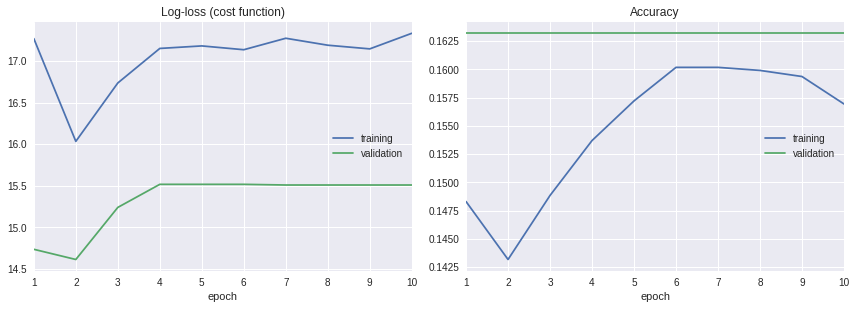

In [0]:
batch_size = 32
epochs = 10
history = model_CNN.fit(X_train_grey, y_train_grey,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3,
                    shuffle=False,
                    callbacks=[PlotLossesKeras()])

In [0]:
y_pred_genres = model_CNN.predict_proba(X_test_grey)
roc_auc_score(y_test_grey, y_pred_genres, average='macro')

0.5

## **Transfer Learning + LSTM ** (Images)

### VGG16

From local machines we obtained the result of the processing of the images with the algorithm VGG16, from this result we train a recurrent neural network.

In [0]:
import pickle
with open("drive/ProyectoFinalDeepLearnig/training_color_160.txt", "rb") as fp:   # Unpickling
   images_training_color = pickle.load(fp)

import pickle
with open("drive/ProyectoFinalDeepLearnig/testing_color_160.txt", "rb") as fp:   # Unpickling
   images_testing_color = pickle.load(fp)

In [24]:
print(images_training_color.shape)
print(images_testing_color.shape)

(7895, 5, 5, 512)
(3383, 5, 5, 512)


In [25]:
from sklearn.model_selection import train_test_split
X_train_ima, X_test_ima, y_train_ima, y_test_ima = train_test_split(images_training_color, y_genres, test_size=0.33, random_state=31415)
print(X_train_ima.shape, X_test_ima.shape, y_train_ima.shape, y_test_ima.shape)

(5289, 5, 5, 512) (2606, 5, 5, 512) (5289, 24) (2606, 24)


In [26]:
drop = 0.4
model_transfer_learning=Sequential()
model_transfer_learning.add(Flatten(input_shape=X_train_ima.shape[1:]))
model_transfer_learning.add(Dropout(drop))
model_transfer_learning.add(Dense(400, activation='relu',kernel_initializer = 'RandomNormal'))
model_transfer_learning.add(Dropout(drop))
model_transfer_learning.add(Dense(24, activation='sigmoid'))
model_transfer_learning.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12800)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 400)               5120400   
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 24)                9624      
Total params: 5,130,024
Trainable params: 5,130,024
Non-trainable params: 0
_________________________________________________________________


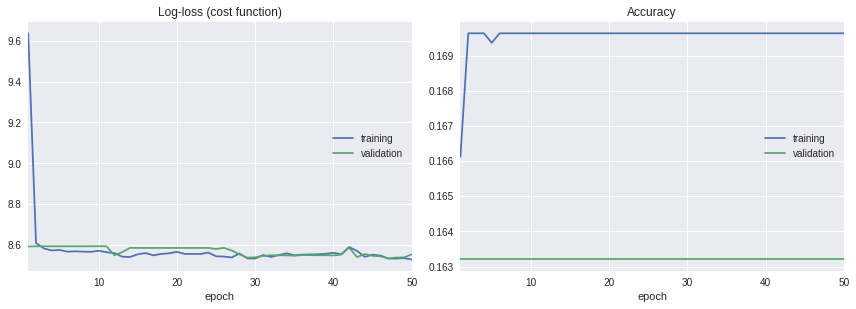

In [27]:
model_transfer_learning.compile(
               optimizer=optimizers.SGD(),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

epochs=50
batch_size = 50

model_transfer_learning.fit(X_train_ima, y_train_ima,
          epochs=epochs,
          shuffle=False,
          validation_split=0.3,
          callbacks=[PlotLossesKeras()])

In [28]:
y_pred_genres = model_transfer_learning.predict_proba(X_test_ima)
roc_auc_score(y_test_ima, y_pred_genres, average='macro')

0.5022879887094811

## Sequential Neural Network (Text)

In [0]:
X_train_texto, X_test_texto, y_train_genres_texto, y_test_genres_texto = train_test_split(dataTraining['plot']
                                                                  , y_genres, test_size=0.33, random_state=1250)

In [0]:
wordnet_lemmatizer = WordNetLemmatizer()
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]


vect = CountVectorizer(ngram_range=(1, 3), max_features=3000, stop_words='english',analyzer=split_into_lemmas)
X_dtm = vect.fit(X_train_texto)
X_train_transformado = vect.transform(X_train_texto)
X_train_transformado.shape
X_test_transformado = vect.transform(X_test_texto)


In [17]:
print(X_train_transformado.shape)
tamano = X_train_transformado.shape[1]
#tamano = X_train_transformado.shape
print(tamano)

(5289, 3000)
3000


In [18]:
model_text = Sequential()
model_text.add(Dense(128, input_shape=(tamano,),kernel_initializer = 'RandomNormal'))
model_text.add(Activation('sigmoid'))
model_text.add(BatchNormalization())
model_text.add(Dropout(0.6))
model_text.add(Dense(50))
model_text.add(Activation('sigmoid'))
model_text.add(Dense(24))
model_text.add(Activation('sigmoid'))
model_text.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               384128    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                6450      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                1224      
__________

In [0]:
lr = 0.1
model_text.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr = lr),
              metrics=['acc']
             )


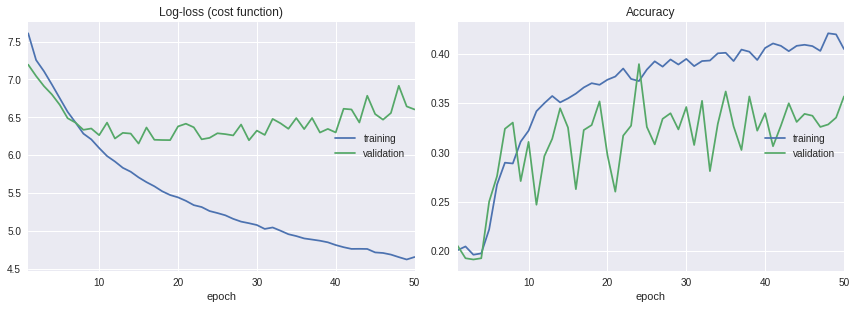

In [20]:
%matplotlib inline

batch_size = 32
epochs = 50
history = model_text.fit(X_train_transformado, y_train_genres_texto,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=False,
                    validation_split=0.3,     
                   callbacks=[PlotLossesKeras()])

In [21]:
y_pred_genres = model_text.predict_proba(X_test_transformado)
roc_auc_score(y_test_genres_texto, y_pred_genres, average='macro')

0.8421097274014211

## Recurrent Neural Network (Text)



In [0]:
X = dataTraining['plot'].tolist()

In [0]:
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}

In [0]:
max_plot_len = 150
X = [x[:max_plot_len] for x in X]

X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [0]:
X_pad = sequence.pad_sequences(X, maxlen=max_plot_len)
X_pad

array([[13, 16, 45, ...,  2,  2, 44],
       [ 0,  0,  0, ...,  6,  2, 60],
       [73, 34,  2, ..., 73, 57,  2],
       ...,
       [57, 73,  6, ..., 73, 34, 14],
       [13, 50, 45, ..., 61, 47, 21],
       [ 0,  0,  0, ..., 21,  2, 60]], dtype=int32)

In [0]:
y_genres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [0]:
X_train_rec, X_test_rec, y_train_rec, y_test_rec = train_test_split(X_pad, y_genres, test_size=0.30, random_state=180720)

LSTM neural network definition



In [0]:
%matplotlib inline

model_rec = Sequential()
model_rec.add(Embedding(len(vocabulary) + 1, 128, input_length=max_plot_len))
model_rec.add(Dropout(0.3))
model_rec.add(LSTM(128, return_sequences = True))
model_rec.add(Dropout(0.3))
model_rec.add(LSTM(64))
model_rec.add(Dropout(0.3))
model_rec.add(Dense(24, activation='sigmoid'))

model_rec.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 128)          9600      
_________________________________________________________________
dropout_5 (Dropout)          (None, 150, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 128)          131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 150, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 24)                1560      
Total para

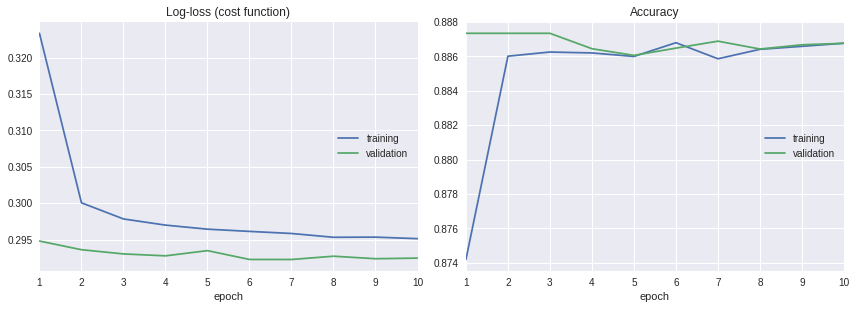

In [0]:
model_rec.compile(optimizer=optimizers.RMSprop(lr = 0.01, decay = 0.01),
               loss='binary_crossentropy',
               metrics=['accuracy'])

model_rec.fit(X_train_rec, y_train_rec, validation_data=[X_test_rec, y_test_rec], epochs=10, batch_size=128,
          callbacks=[PlotLossesKeras()])

In [0]:
ypred_rec=model_rec.predict(X_test_rec)
from sklearn.metrics import roc_auc_score

print('ROC',roc_auc_score(y_test_rec,ypred_rec,average='macro'))

ROC 0.49951150266257677


## Combine Outputs (Images + Text)

We combine the outputs of the sequential model of text and of transfer learning of images as input of a neural network

In [48]:
X_train_ima, X_test_ima, y_train_ima, y_test_ima, X_train_texto, X_test_texto = train_test_split(images_training_color, y_genres,dataTraining['plot'], 
                                                                                                 test_size=0.33, random_state=560)
print(X_train_ima.shape, X_test_ima.shape, y_train_ima.shape, y_test_ima.shape,X_train_texto.shape, X_test_texto.shape)

(5289, 5, 5, 512) (2606, 5, 5, 512) (5289, 24) (2606, 24) (5289,) (2606,)


In [50]:
train_prediccion_texto = model_text.predict_proba(vect.transform(X_train_texto))
train_prediccion_imagen = model_transfer_learning.predict_proba(X_train_ima)
x_train_union = np.concatenate((train_prediccion_texto, train_prediccion_imagen), axis=1)
print(x_train_union.shape)

train_prediccion_texto = model_text.predict_proba(vect.transform(X_test_texto))
train_prediccion_imagen = model_transfer_learning.predict_proba(X_test_ima)
x_test_union = np.concatenate((train_prediccion_texto, train_prediccion_imagen), axis=1)
print(x_test_union.shape)
shape_pred = x_train_union.shape[1]

(5289, 48)
(2606, 48)


In [51]:
model_union_predict_input = Sequential()
model_union_predict_input.add(Dense(24, input_shape=(shape_pred,),kernel_initializer = 'RandomNormal'))
model_union_predict_input.add(Activation('sigmoid'))
model_union_predict_input.add(Dense(24))
model_union_predict_input.add(Activation('sigmoid'))
model_union_predict_input.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 24)                1176      
_________________________________________________________________
activation_10 (Activation)   (None, 24)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 24)                600       
_________________________________________________________________
activation_11 (Activation)   (None, 24)                0         
Total params: 1,776
Trainable params: 1,776
Non-trainable params: 0
_________________________________________________________________


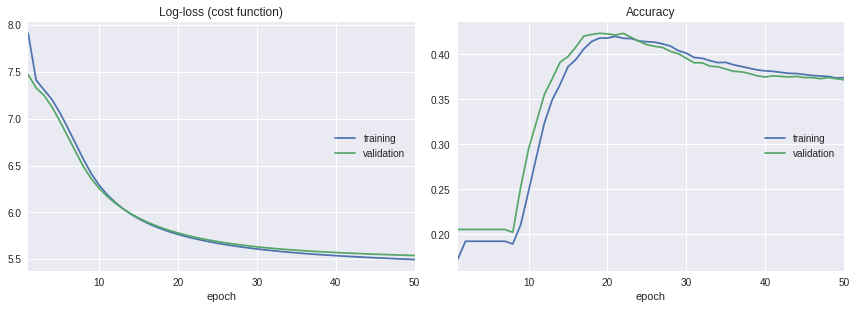

In [52]:
rate = 0.1
model_union_predict_input.compile(loss='categorical_crossentropy',
              optimizer=Adam(),                         
              metrics=['acc']
          )
batch_size = 32
epochs = 50
history = model_union_predict_input.fit(x_train_union, y_train_ima,
                    epochs=epochs,
                    verbose=1,
                    shuffle=False,
                    validation_split=0.3,
                   callbacks=[PlotLossesKeras()])

In [53]:
y_pred_genres = model_union_predict_input.predict_proba(x_test_union)
roc_auc_score(y_test_ima, y_pred_genres, average='macro')

0.8889517182136649

In [0]:
x_kaggle_union = np.concatenate((model_text.predict_proba(vect.transform(dataTesting['plot'])), model_transfer_learning.predict_proba(images_testing_color)), axis=1)
y_pred_kaggle_model = model_union_predict_input.predict_proba(x_kaggle_union)

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

pd.DataFrame(y_pred_kaggle_model, index=dataTesting.index, columns=cols).to_csv('Prediction_Deep_Learning_v1.csv', index_label='ID')

In [0]:
from google.colab import files
files.download('Prediction_Deep_Learning_v1.csv')

##Combine Imputs  (Images + Text)

We combine the imput as input of a neural network

In [63]:
X_train_ima, X_test_ima, y_train, y_test, X_train_text, X_test_text = train_test_split(images_training_color, y_genres, dataTraining['plot'], test_size=0.33, random_state=31415)
print(X_train_ima.shape, X_test_ima.shape, y_train.shape, y_test.shape, X_train_text.shape,X_test_text.shape )

(5289, 5, 5, 512) (2606, 5, 5, 512) (5289, 24) (2606, 24) (5289,) (2606,)


In [65]:
Input_image = Input(shape=(5,5,512), name='input1')
X_train_transformado = vect.transform(X_train_text)
tam_texto = X_train_transformado.shape[1:]
print (X_train_transformado.shape[1:])
Input_text = Input(shape=tam_texto, name = 'input2')

(3000,)


In [0]:
#Codigo inspirado en https://www.kaggle.com/hireme/two-inputs-neural-network-using-keras

x = Flatten()(Input_image)
x = Dropout(0.5)(x)
x = Dense(400)(x)
x = BatchNormalization()(x)
x = Activation('tanh')(x)
x = Dropout(0.5)(x)
x = Dense(24)(x)
x = Activation('sigmoid')(x)
x = concatenate([x, Input_text])
x = Dense(128)(x)
x = Activation('sigmoid')(x)
x = BatchNormalization()(x)
x = Dropout(0.6)(x)
x = Dense(50)(x)
x = Activation('sigmoid')(x)
out = Dense(24, activation='sigmoid')(x)

In [67]:
model = Model(inputs=[Input_image, Input_text], outputs=out)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input1 (InputLayer)             (None, 5, 5, 512)    0                                            
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 12800)        0           input1[0][0]                     
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 12800)        0           flatten_4[0][0]                  
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 400)          5120400     dropout_7[0][0]                  
__________________________________________________________________________________________________
batch_norm

In [0]:
rate=0.02
model.compile(
               optimizer=optimizers.SGD(lr = rate),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

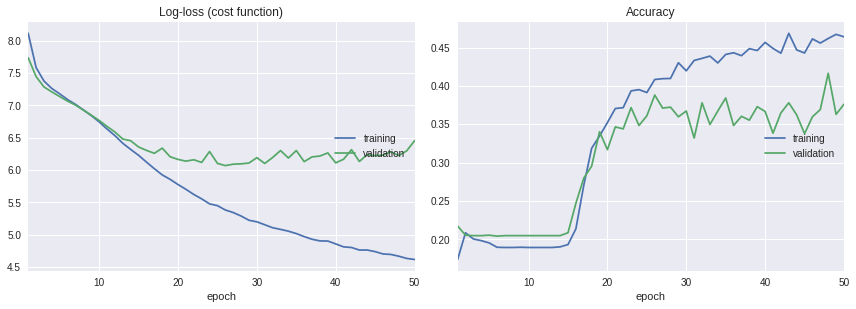

In [69]:
epochs=50
batch_size = 50

model.fit([X_train_ima,X_train_transformado], y_train,
          epochs=epochs,
          shuffle=False,
          validation_split=0.3,
          callbacks=[PlotLossesKeras()])

In [70]:
y_pred_genres = model.predict([X_test_ima,vect.transform(X_test_text)])
roc_auc_score(y_test, y_pred_genres, average='macro')

0.8360341254378613

In [0]:
y_pred_avg = model.predict([images_testing_color,vect.transform(dataTesting['plot'])])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

pd.DataFrame(y_pred_avg, index=dataTesting.index, columns=cols).to_csv('Prediction_Deep_Learning_v2.csv', index_label='ID')


In [0]:
from google.colab import files
files.download('Prediction_Deep_Learning_v2.csv')